### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [99]:

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
sb.set() 
linreg = LinearRegression()

### Import the Dataset

In [100]:
data = pd.read_csv('quizData_SetC.csv')
data.head()

,Shucked,Viscera,Shell,Weight
0,0.2565,0.1415,0.21,0.6770
1,0.2370,0.1415,0.33,0.7775
2,0.2940,0.1495,0.26,0.7680
3,0.3145,0.1510,0.32,0.8945
4,0.1940,0.1475,0.21,0.6065


### Describe

In [101]:
data.describe()

,Shucked,Viscera,Shell,Weight
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.355179,0.178666,0.236674,0.819622
std,0.221220,0.109560,0.139511,0.489400
min,0.001000,0.000500,0.001500,0.002000
25%,0.180875,0.091000,0.125375,0.433500
50%,0.331750,0.168250,0.229500,0.787750
75%,0.497500,0.250000,0.325000,1.144500
max,1.488000,0.760000,1.005000,2.825500


### Statistical Distributions

<AxesSubplot: >

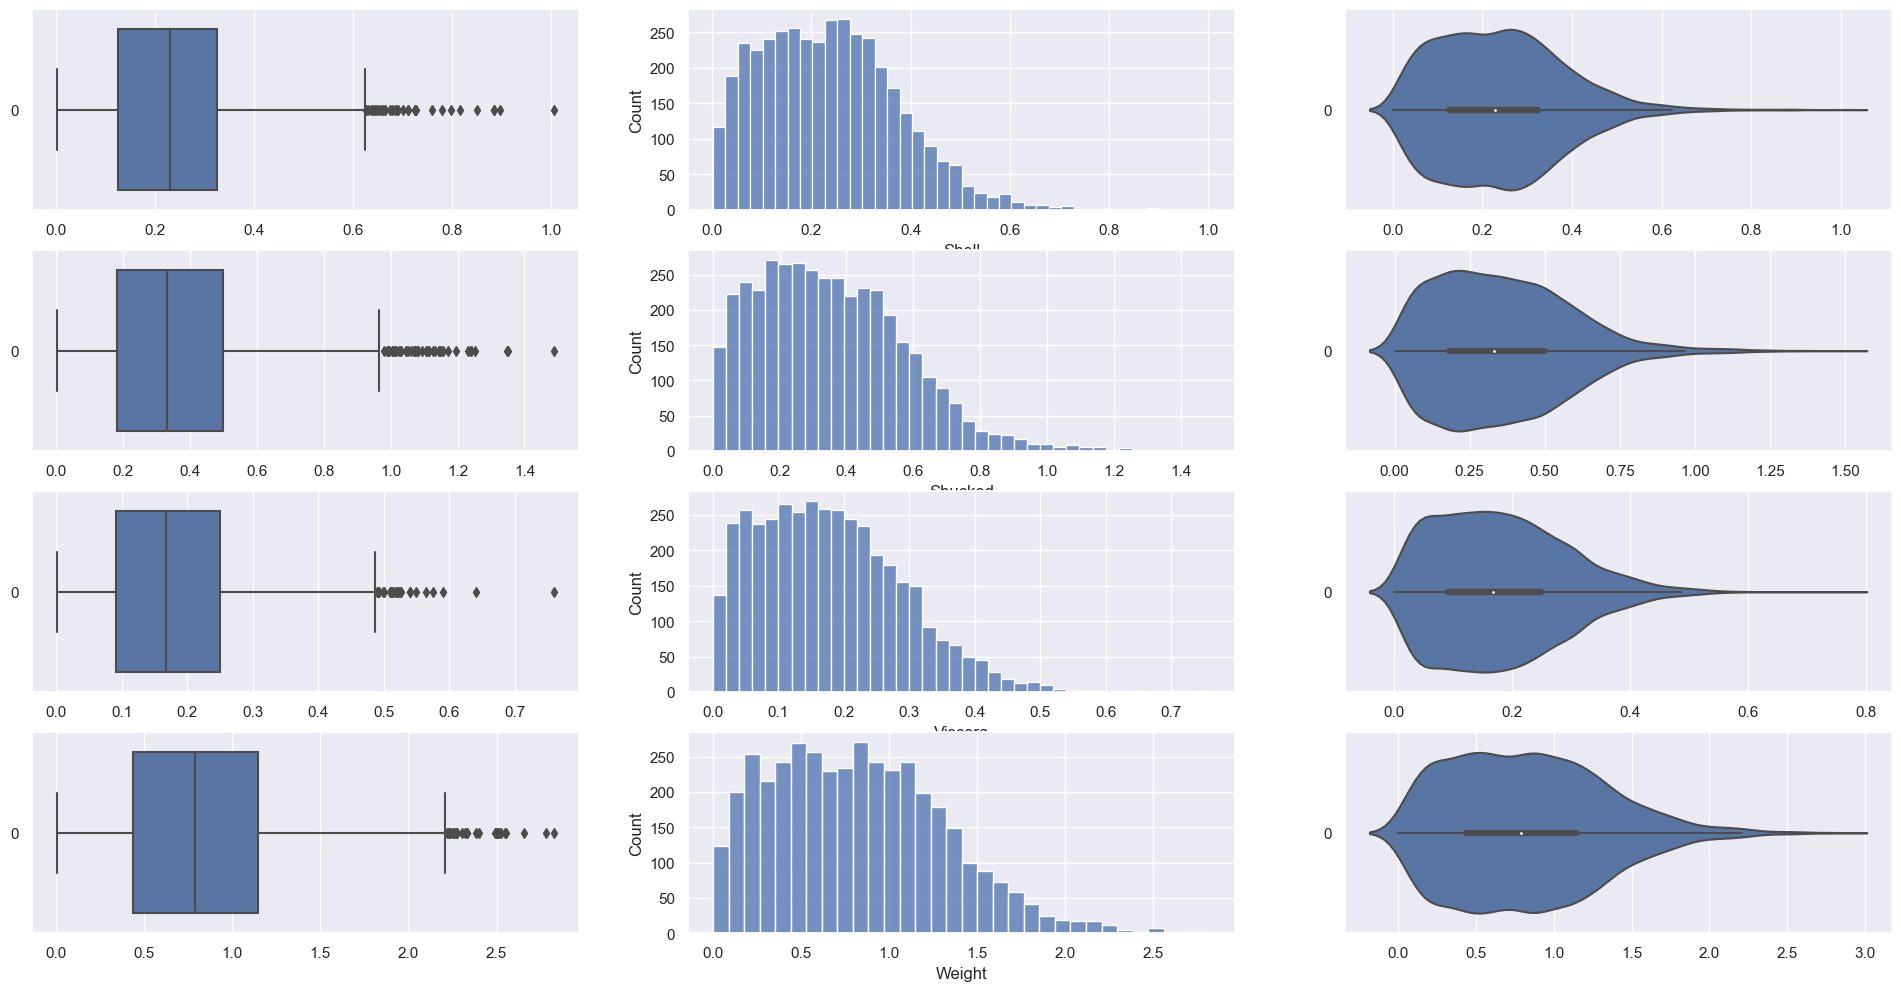

In [102]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(4, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for Shell
sb.boxplot(data = data['Shell'], orient = "h", ax = axes[0,0])
sb.histplot(data = data['Shell'], ax = axes[0,1])
sb.violinplot(data = data['Shell'], orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Shucked
sb.boxplot(data = data['Shucked'], orient = "h", ax = axes[1,0])
sb.histplot(data = data['Shucked'], ax = axes[1,1])
sb.violinplot(data = data['Shucked'], orient = "h", ax = axes[1,2])

# Plot the basic uni-variate figures for Viscera
sb.boxplot(data = data['Viscera'], orient = "h", ax = axes[2,0])
sb.histplot(data = data['Viscera'], ax = axes[2,1])
sb.violinplot(data = data['Viscera'], orient = "h", ax = axes[2,2])

# Plot the basic uni-variate figures for Weight
sb.boxplot(data = data['Weight'], orient = "h", ax = axes[3,0])
sb.histplot(data = data['Weight'], ax = axes[3,1])
sb.violinplot(data = data['Weight'], orient = "h", ax = axes[3,2])

##### 'Weight' has the most "Normal" Distribution. Variable 'Shucked' has the most outliers.

### Correlation Heatmap

In [103]:
data.corr()


,Shucked,Viscera,Shell,Weight
Shucked,1.000000,0.932692,0.884262,0.969684
Viscera,0.932692,1.000000,0.908729,0.966682
Shell,0.884262,0.908729,1.000000,0.956745
Weight,0.969684,0.966682,0.956745,1.000000


<AxesSubplot: >

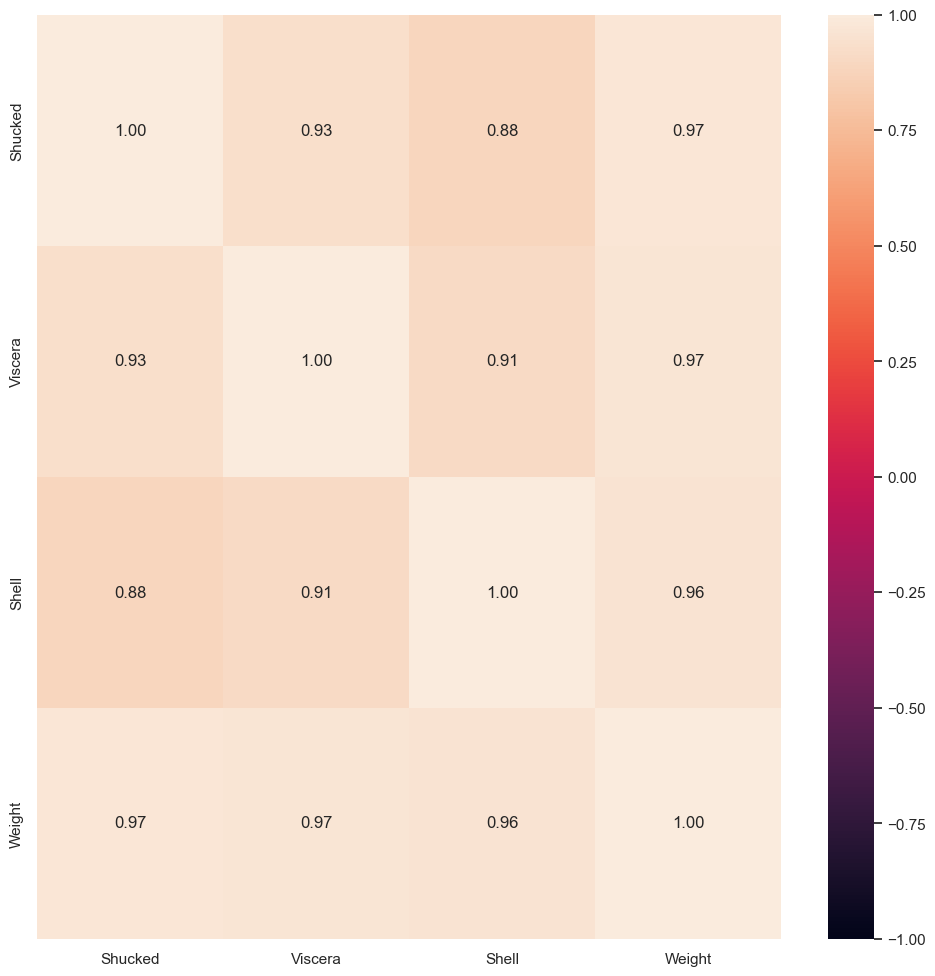

In [104]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

##### Variable 'Shucked' has the highest absolute correlation with Weight and is the strongest correlation to predict weight.

### Overall Pairplot

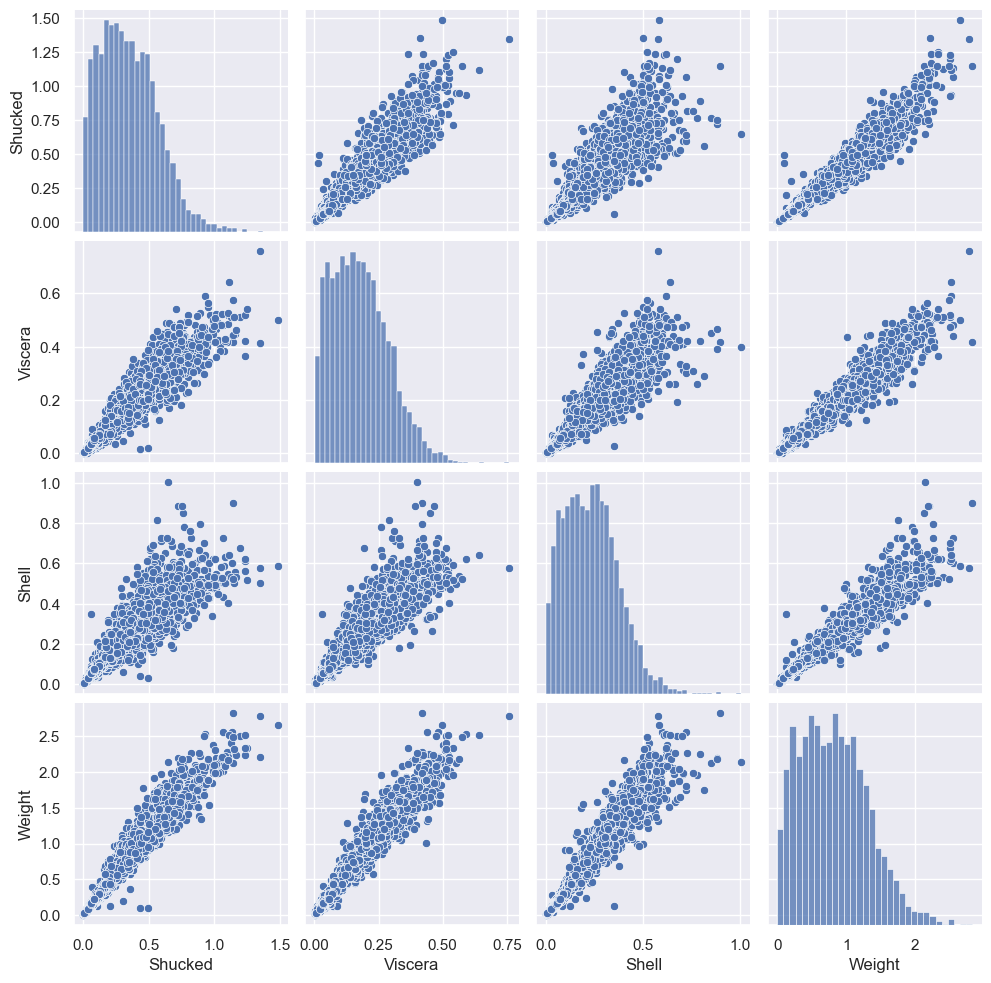

In [105]:
sb.pairplot(data = data)

### Mutual Jointplot

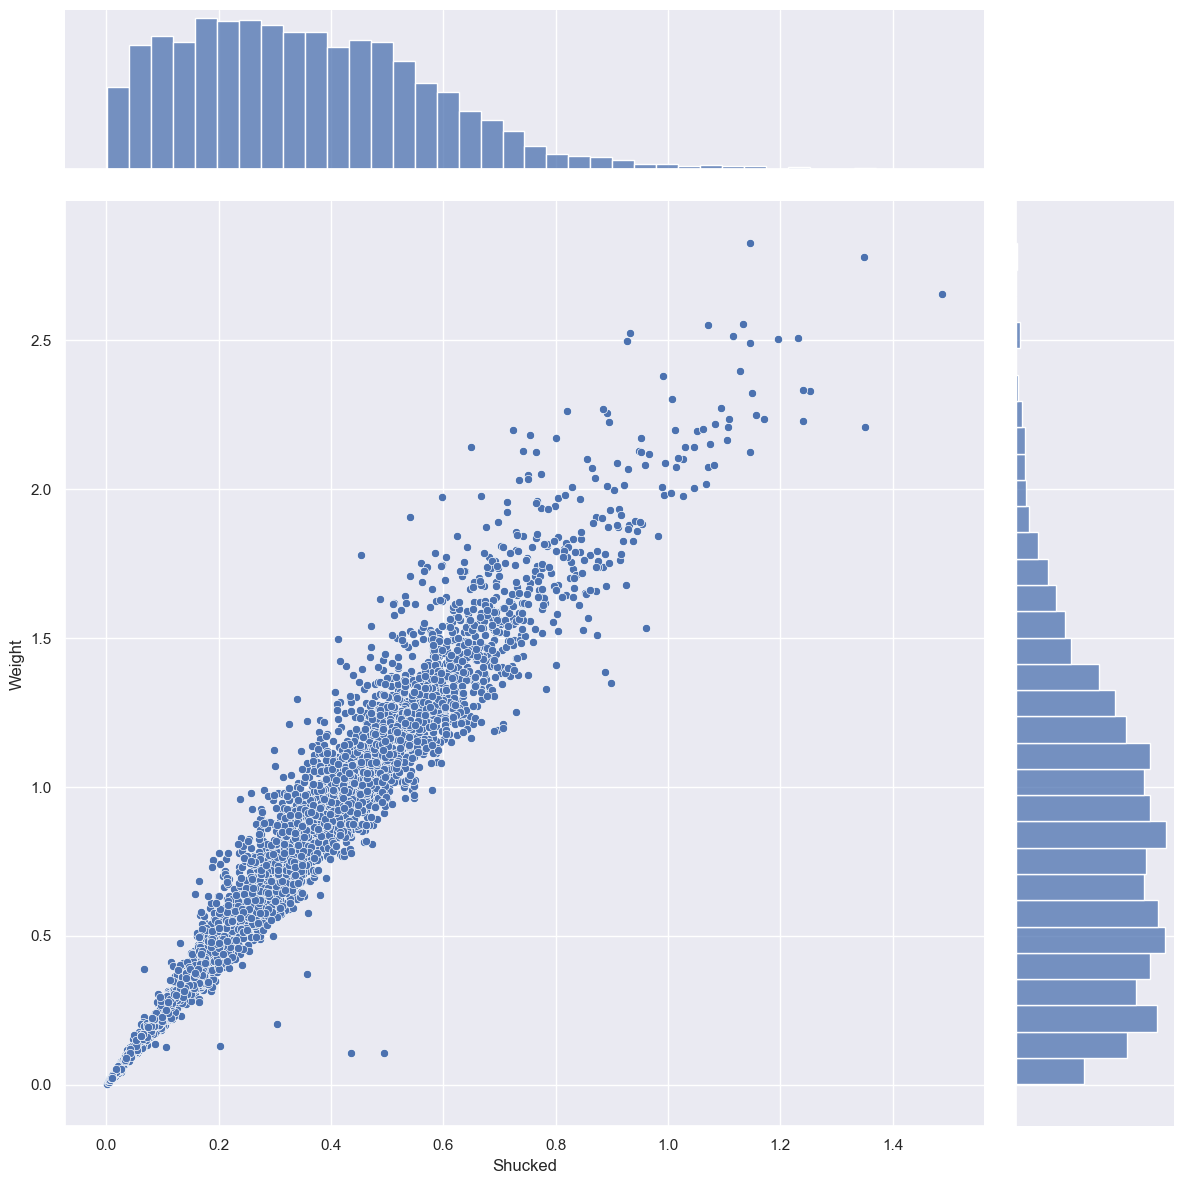

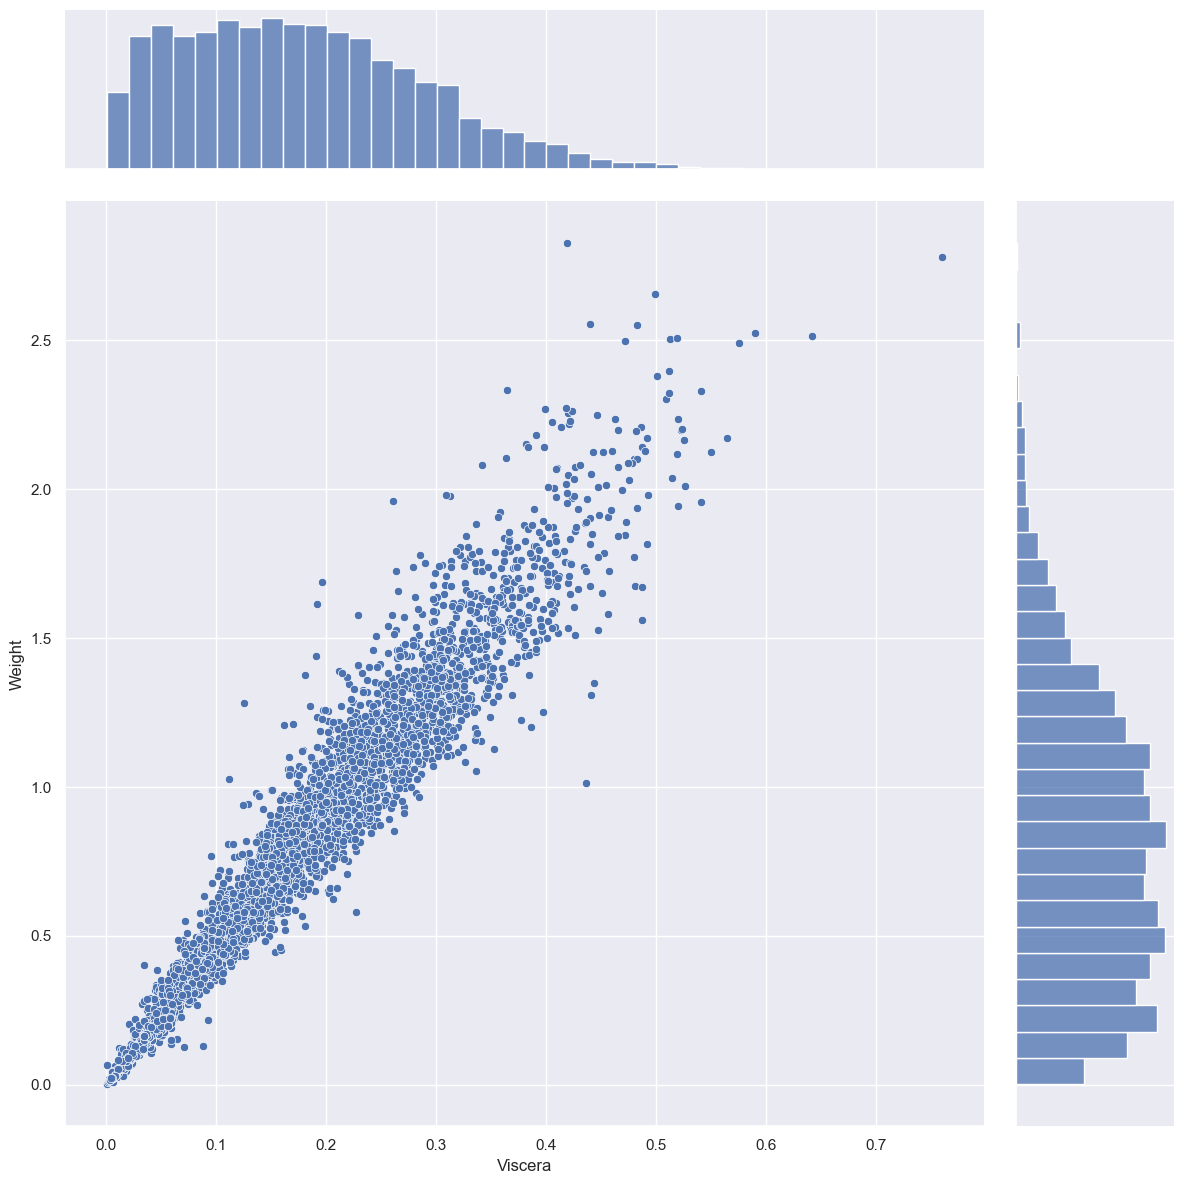

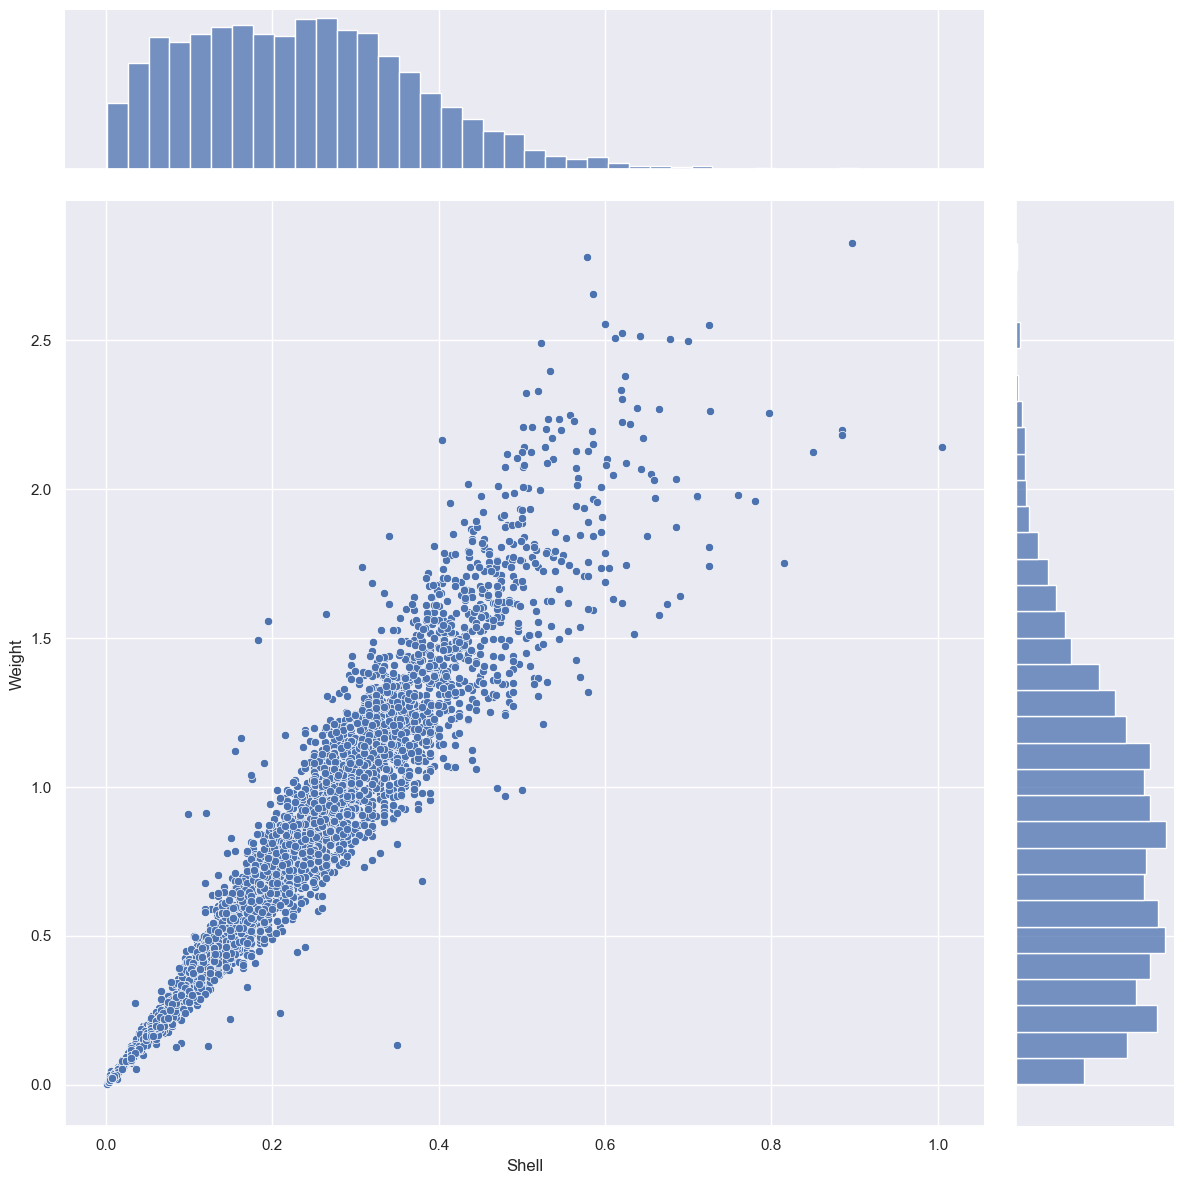

In [106]:
sb.jointplot(data = data, x = "Shucked", y = "Weight", height = 12)
sb.jointplot(data = data, x = "Viscera", y = "Weight", height = 12)
sb.jointplot(data = data, x = "Shell", y = "Weight", height = 12)

##### 'Shucked' has the strongest linear relation with 'Weight'. This will be useful in prediction

### Train and Test Datasets

In [107]:
print("Data type : ", type(data))
print("Data dims : ", data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (4000, 4)


In [108]:
shucked = pd.DataFrame(data['Shucked']) 
viscera = pd.DataFrame(data['Viscera']) 
shell = pd.DataFrame(data['Shell'])  
weight = pd.DataFrame(data['Weight']) 

weight_train = pd.DataFrame(weight[:3200])
shucked_train = pd.DataFrame(shucked[:3200])
viscera_train = pd.DataFrame(viscera[:3200])
shell_train = pd.DataFrame(shell[:3200])

weight_test = pd.DataFrame(weight[:-800])
shucked_test = pd.DataFrame(shucked[:-800])
viscera_test = pd.DataFrame(viscera[:-800])
shell_test = pd.DataFrame(shell[:-800])

### Coefficients, Regression Line and Predict


#### 'Weight' vs 'Shucked'

In [109]:
linreg.fit(shucked_train, weight_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [0.04239345]
Coefficients 	: a =  [[2.19552135]]


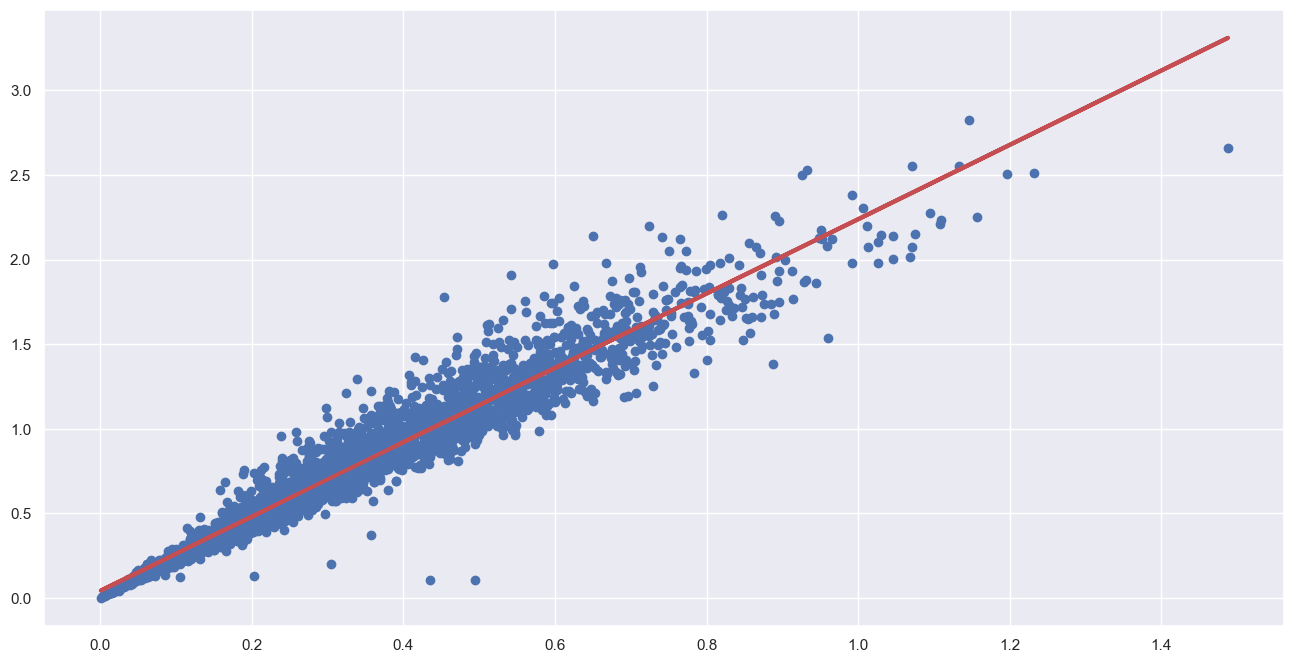

In [110]:
regline_x = shucked_train
regline_y = linreg.intercept_ + linreg.coef_ * shucked_train

f = plt.figure(figsize=(16, 8))
plt.scatter(shucked_train, weight_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(), 'r-', linewidth = 3)
plt.show()

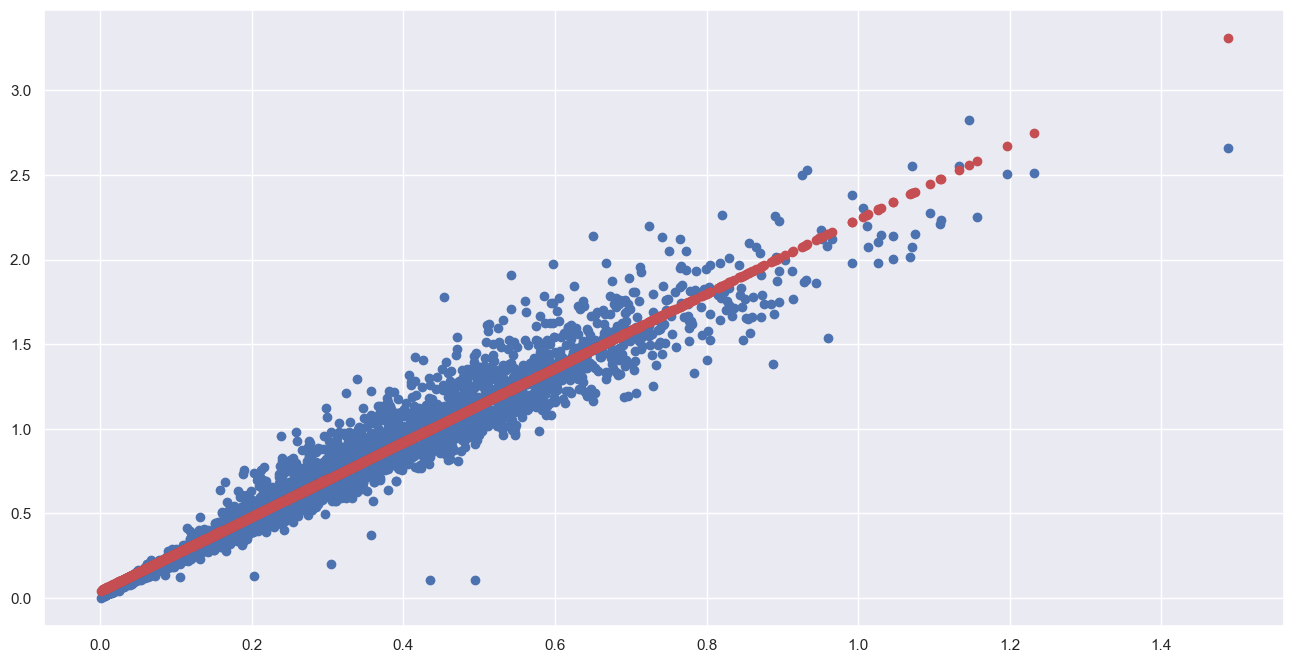

In [111]:
weight_train_pred = linreg.predict(shucked_train)

f = plt.figure(figsize=(16, 8))
plt.scatter(shucked_train, weight_train)
plt.scatter(shucked_train, weight_train_pred, color = "r")
plt.show()

In [112]:
print("Explained Variance (R^2) \t:", linreg.score(shucked_train, weight_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(weight_train, weight_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.9416265630600396
Mean Squared Error (MSE) 	: 0.013500521333876948
Root Mean Squared Error (RMSE) 	: 0.11619174382836737


#### 'Weight' vs 'Viscera'

In [113]:
linreg.fit(viscera_train, weight_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [0.04076223]
Coefficients 	: a =  [[4.34892962]]


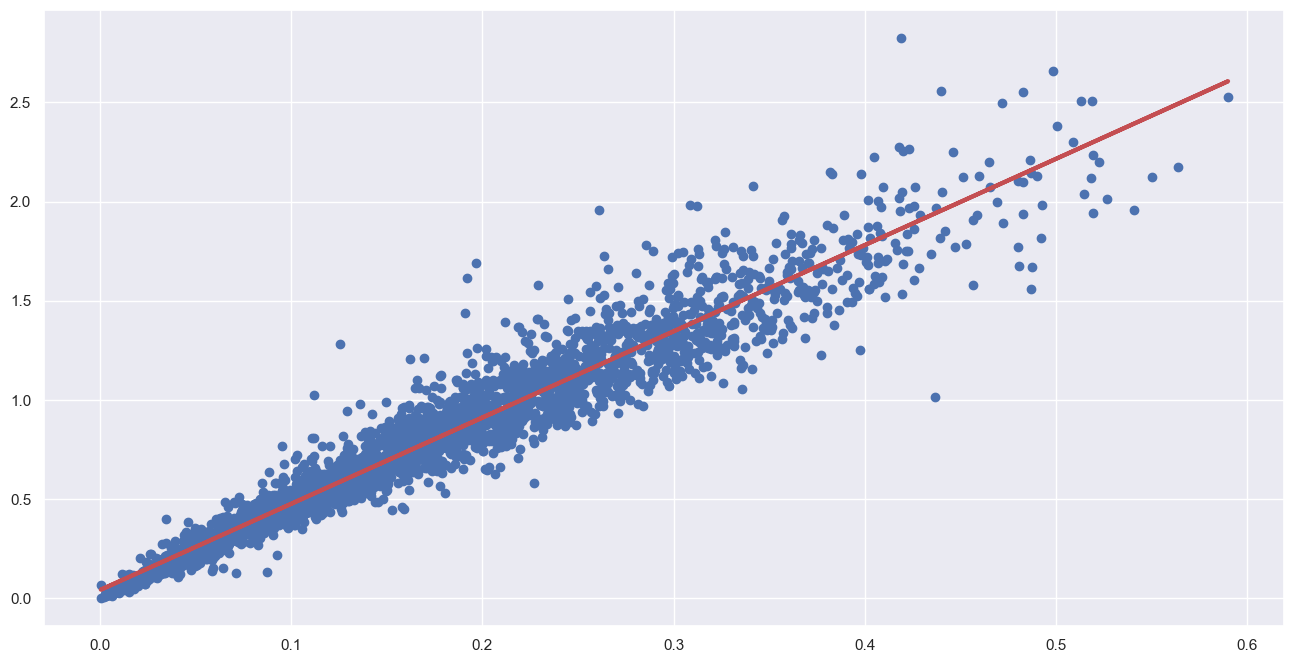

In [114]:
# Formula for the Regression line
regline_x = viscera_train
regline_y = linreg.intercept_ + linreg.coef_ * viscera_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(viscera_train, weight_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(), 'r-', linewidth = 3)
plt.show()

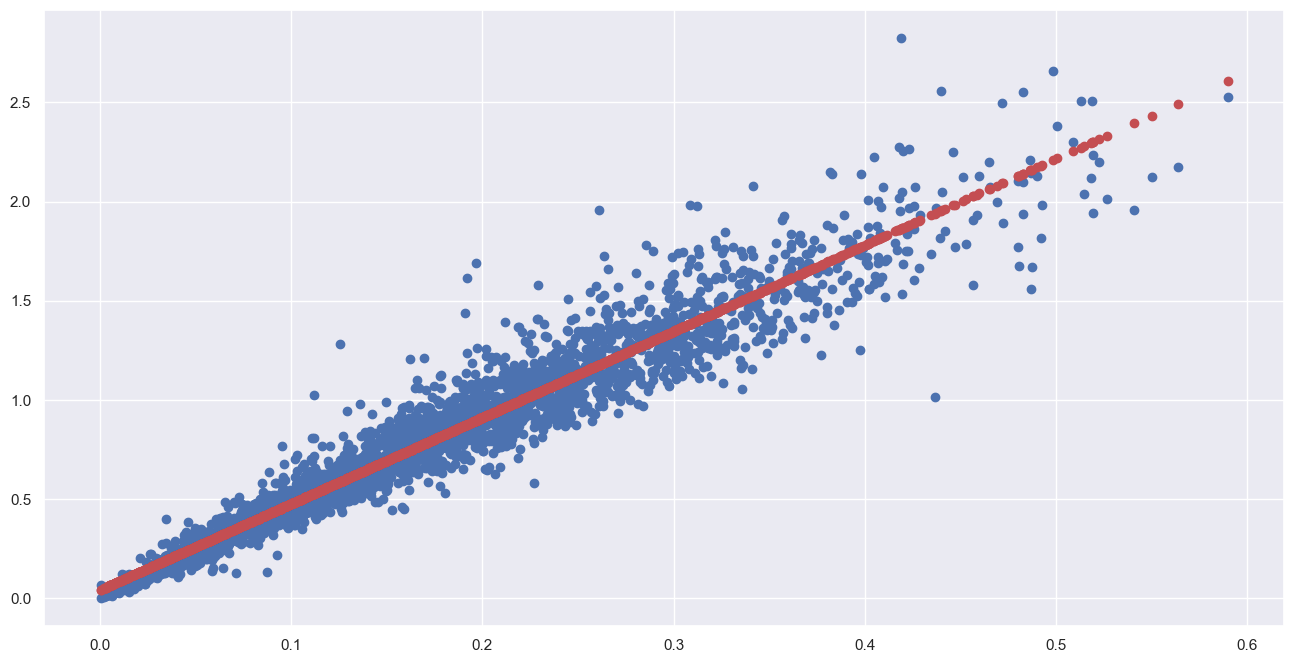

In [115]:
weight_train_pred = linreg.predict(viscera_train)

f = plt.figure(figsize=(16, 8))
plt.scatter(viscera_train, weight_train)
plt.scatter(viscera_train, weight_train_pred, color = "r")
plt.show()

In [116]:
print("Explained Variance (R^2) \t:", linreg.score(viscera_train, weight_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(weight_train, weight_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.9365652771453103
Mean Squared Error (MSE) 	: 0.014671087982863769
Root Mean Squared Error (RMSE) 	: 0.1211242666969083


#### 'Weight' vs 'Shell'

In [117]:
linreg.fit(shell_train, weight_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [0.02602094]
Coefficients 	: a =  [[3.31958171]]


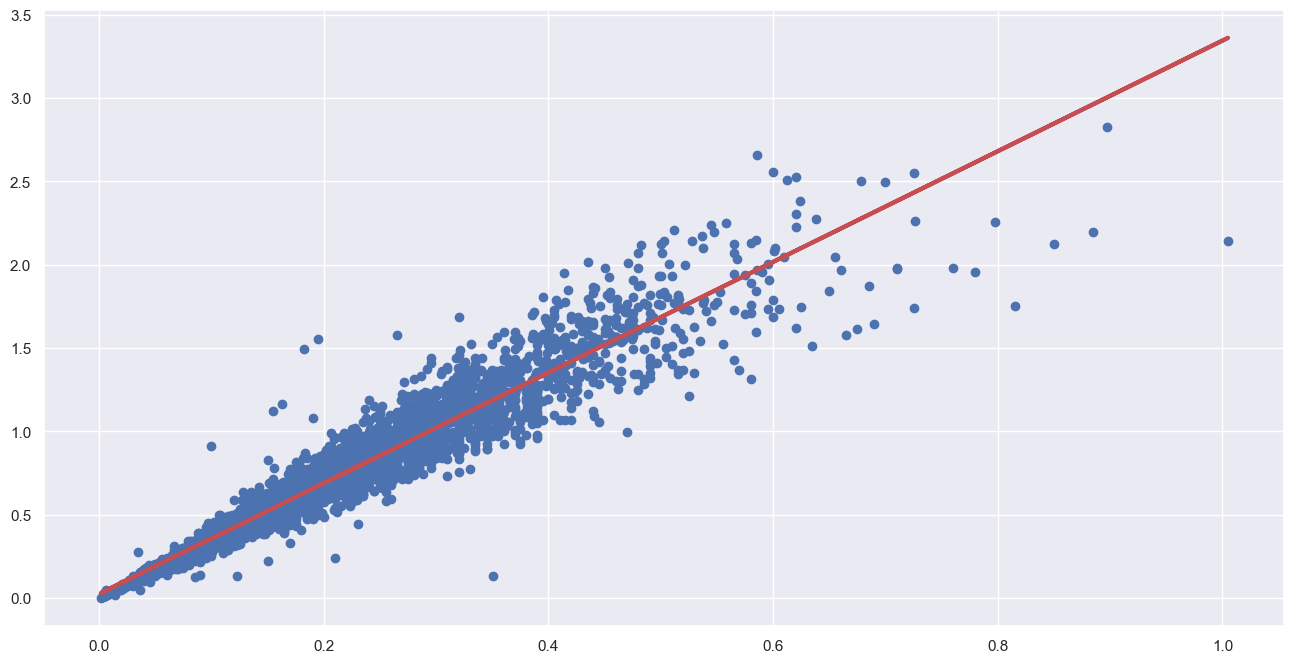

In [118]:
# Formula for the Regression line
regline_x = shell_train
regline_y = linreg.intercept_ + linreg.coef_ * shell_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(shell_train, weight_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(), 'r-', linewidth = 3)
plt.show()

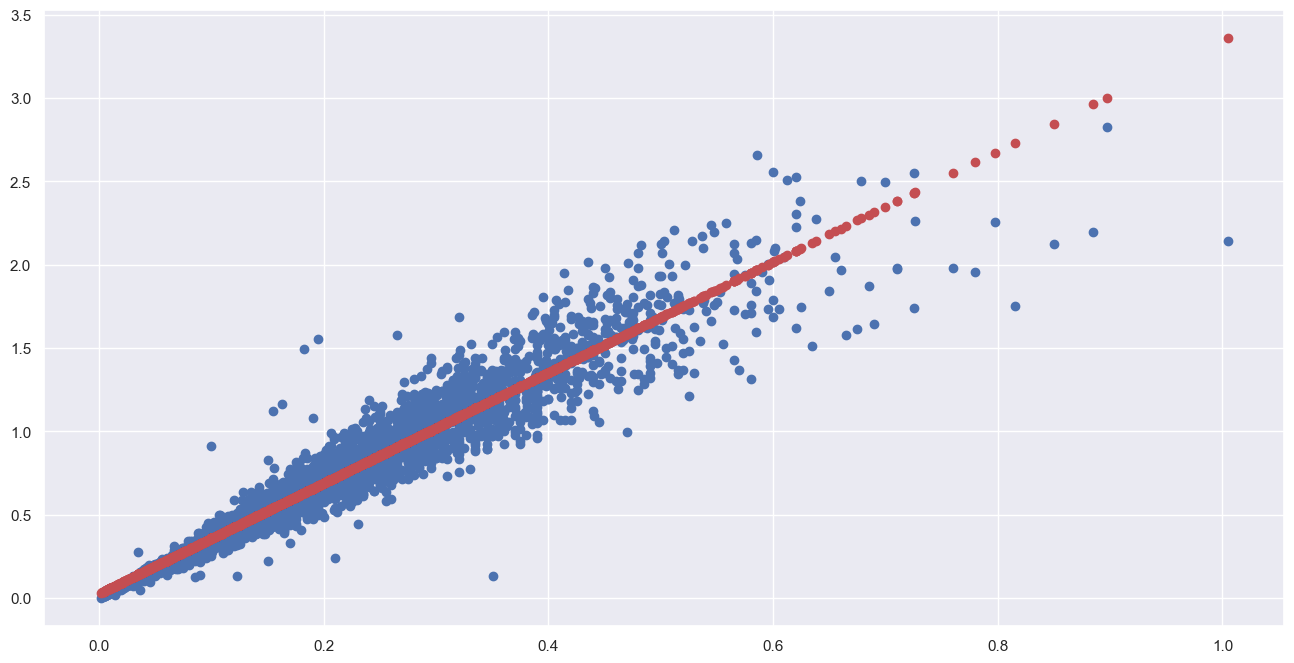

In [119]:
weight_train_pred = linreg.predict(shell_train)

f = plt.figure(figsize=(16, 8))
plt.scatter(shell_train, weight_train)
plt.scatter(shell_train, weight_train_pred, color = "r")
plt.show()

In [120]:
print("Explained Variance (R^2) \t:", linreg.score(shell_train, weight_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(weight_train, weight_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.9226267592944088
Mean Squared Error (MSE) 	: 0.017894767578812
Root Mean Squared Error (RMSE) 	: 0.13377132569729583


#### 'Shucked' is the best in terms of predicting 'Weight' as the coefficients is the lowest. MSE AND RMSE is also the lowest.

### Multi-Variable Linear Regression

In [121]:
y = pd.DataFrame(data["Weight"])
X = pd.DataFrame(data[["Shucked", "Viscera", "Shell"]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
linreg = LinearRegression()

#### Prediciton on Train Datasets

Intercept of Regression 	: b =  [-0.00733827]
Coefficients of Regression 	: a =  [[0.93807102 1.06906455 1.27910022]]

  Predictors  Coefficients
0    Shucked      0.938071
1    Viscera      1.069065
2      Shell      1.279100



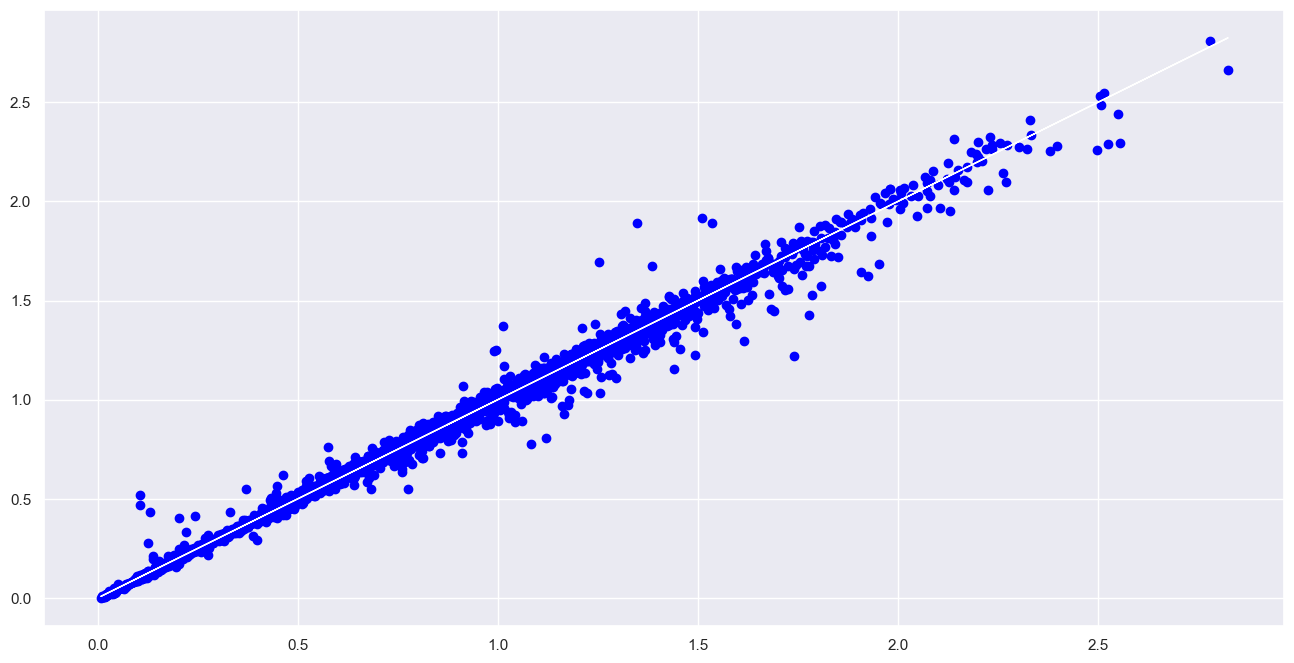

Goodness of Fit of Model 	 Train Dataset
Explained Variance (R^2) 	: 0.9907862740049876
Mean Squared Error (MSE) 	: 0.002194559112860101



In [122]:
linreg.fit(X_train, y_train)

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

y_train_pred = linreg.predict(X_train)

f = plt.figure(figsize=(16, 8))
plt.scatter(y_train, y_train_pred, color = "blue")
plt.plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
plt.show()

print("Goodness of Fit of Model \t Train Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

### Prediction on Test Datasets

Intercept of Regression 	: b =  [-0.00635297]
Coefficients of Regression 	: a =  [[0.91019482 1.21526451 1.20586065]]

  Predictors  Coefficients
0    Shucked      0.910195
1    Viscera      1.215265
2      Shell      1.205861



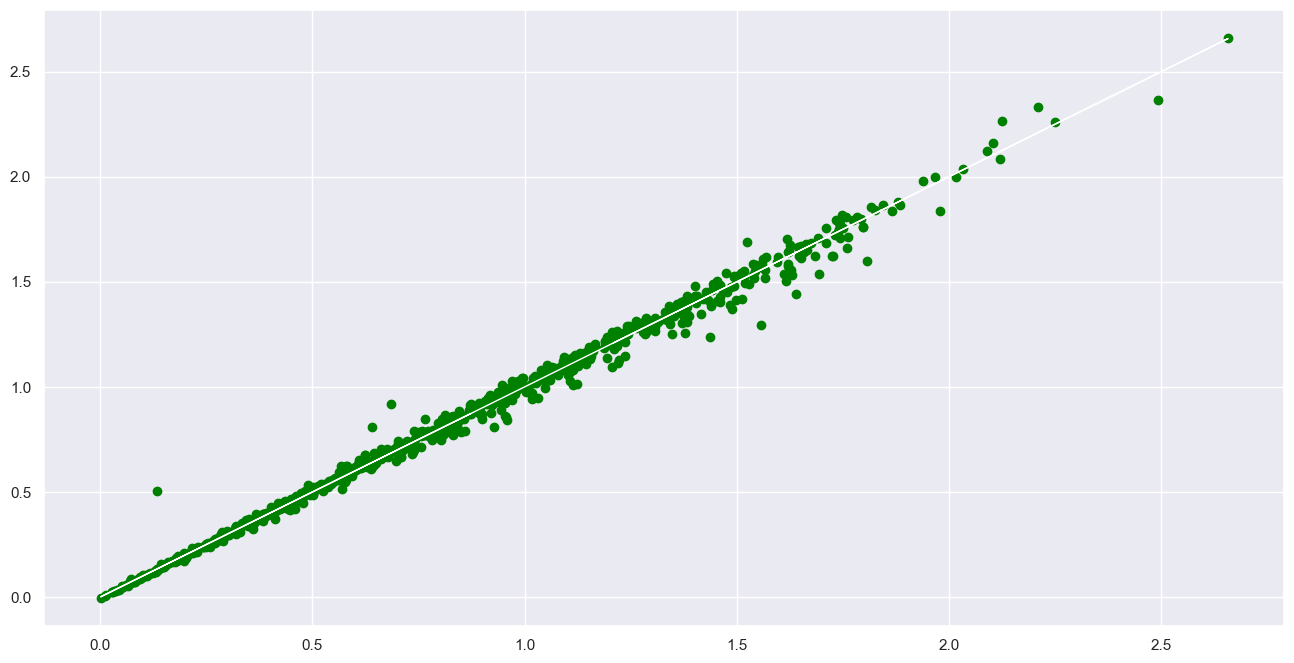

Goodness of Fit of Model 	 Test Dataset
Explained Variance (R^2) 	: 0.9938771433953838
Mean Squared Error (MSE) 	: 0.0014966712688578815



In [123]:
linreg.fit(X_test, y_test)

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

print(pd.DataFrame(list(zip(X_test.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(y_test, y_test_pred, color = "green")
plt.plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
plt.show()

print("Goodness of Fit of Model \t Test Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()